In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
# upload dataset from local
from google.colab import files
upload =files.upload()

Saving GD1.csv to GD1.csv


In [3]:
df =pd.read_csv('GD1.csv')
df


,Date,Time,Output_Volumn,RPM,Current,Temp.Motor,Date_Change_Grinding,Count_Grinding,Output/Current,chang_Grinding,chang_Grinding_I
0,2023-02-17 00:00:00,23:40:24,438.969360,209.29829,339.509567,78.000000,2023-01-27 8:02:20,1,1.292951,0,0
1,2023-02-18 00:00:00,23:40:24,437.152008,259.05379,259.053789,74.500000,2023-01-27 8:02:20,2,1.687495,0,0
2,2023-02-19 00:00:00,23:40:24,459.638092,292.65894,292.658941,71.000000,2023-01-27 8:02:20,3,1.570559,0,0
3,2023-02-20 00:00:00,23:40:24,386.098511,217.55669,217.556687,69.333333,2023-01-27 8:02:20,4,1.774703,0,0
4,2023-02-21 00:00:00,23:40:24,503.905029,303.60207,303.602067,65.000000,2023-01-27 8:02:20,5,1.659755,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,2024-03-18 00:00:00,23:40:24,395.706238,342.77518,342.775179,82.666667,2024-02-15 12:21:08,64,1.154419,0,0
396,2024-03-19 00:00:00,23:40:24,396.438812,239.26771,239.267714,87.000000,2024-02-15 12:21:08,65,1.656884,0,0
397,2024-03-20 00:00:00,23:40:24,427.867584,250.36004,250.360044,79.333333,2024-02-15 12:21:08,66,1.709009,0,0
398,2024-03-21 00:00:00,23:40:24,443.448792,342.39487,342.394874,79.750000,2024-02-15 12:21:08,67,1.295139,0,0


In [4]:
df.drop('Date',axis=1,inplace=True)
df.drop('Time',axis=1,inplace=True)
df.drop('Date_Change_Grinding',axis=1,inplace=True)
df.drop('Count_Grinding',axis=1,inplace=True)
df.drop('chang_Grinding',axis=1,inplace=True)

In [5]:
df.drop('Date_Time',axis=1,inplace=True)
# df.drop('O:C',axis=1,inplace=True)

KeyError: "['Date_Time'] not found in axis"

In [ ]:
df.drop('Date',axis=1,inplace=True)

In [ ]:
df.drop('Time',axis=1,inplace=True)

In [ ]:
df.drop('Date_Change_Grinding',axis=1,inplace=True)

In [6]:
# Label_encode

le = LabelEncoder()
df['Output_Volumn'] = le.fit_transform(df['Output_Volumn'])
df['RPM'] = le.fit_transform(df['RPM'])
df['Current'] = le.fit_transform(df['Current'])
df['Temp.Motor'] = le.fit_transform(df['Temp.Motor'])
#df['Count_Grinding'] = le.fit_transform(df['Count_Grinding'])
df['Output/Current'] = le.fit_transform(df['Output/Current'])
#df['chang_Grinding'] = le.fit_transform(df['chang_Grinding'])

In [7]:
df =df.dropna()
df

,Output_Volumn,RPM,Current,Temp.Motor,Output/Current,chang_Grinding_I
0,284,40,310,79,171,0
1,283,122,121,63,322,0
2,331,204,203,46,285,0
3,172,51,50,39,342,0
4,385,235,234,19,316,0
...,...,...,...,...,...,...
395,194,318,318,109,118,0
396,196,83,82,131,315,0
397,272,104,103,87,327,0
398,294,317,317,92,173,0


In [8]:
X =df.drop(['chang_Grinding_I'],axis=1)
y = df['chang_Grinding_I']

In [9]:
X

,Output_Volumn,RPM,Current,Temp.Motor,Output/Current
0,284,40,310,79,171
1,283,122,121,63,322
2,331,204,203,46,285
3,172,51,50,39,342
4,385,235,234,19,316
...,...,...,...,...,...
395,194,318,318,109,118
396,196,83,82,131,315
397,272,104,103,87,327
398,294,317,317,92,173


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
classifier = DecisionTreeClassifier()

In [12]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
y_pred = classifier.predict(X_test)

In [14]:
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

Accuracy: 1.00


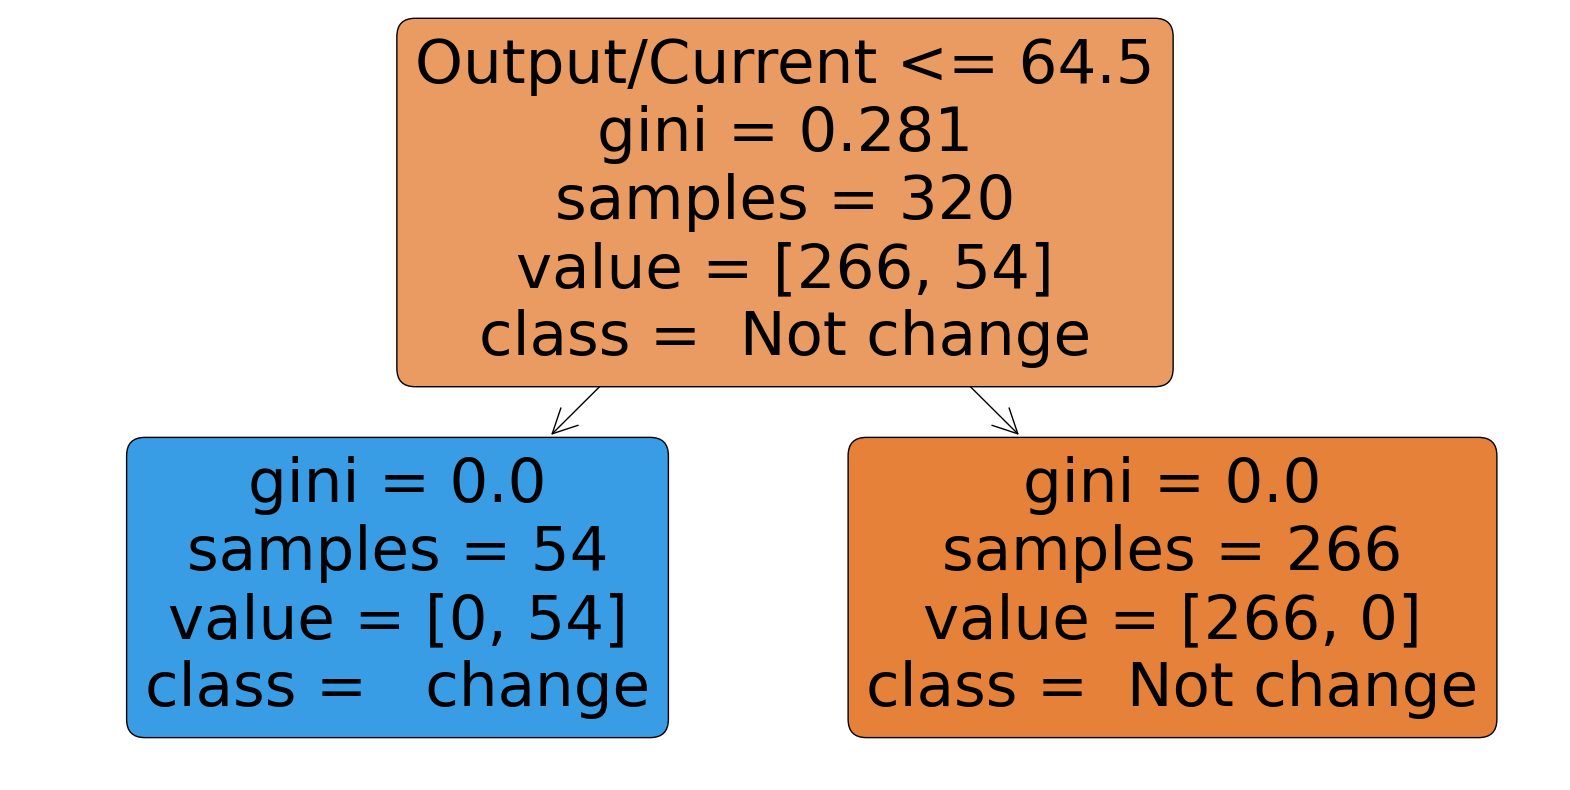

In [15]:
plt.figure(figsize=(20,10))
tree.plot_tree(classifier, filled=True, feature_names=X.columns, class_names=[' Not change', '  change'], rounded=True)
plt.show()

In [18]:
from sklearn.metrics import confusion_matrix

# สมมติว่า y_test เป็น ground truth และ y_pred เป็นค่าที่ทำนายได้
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[69  0]
 [ 0 11]]


In [19]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print("Confusion Matrix:")

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')

# Calculate Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# Calculate Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

Confusion Matrix:
Accuracy: 1.00
F1 Score: 1.00
Recall: 1.00
Precision: 1.00


In [20]:
df.drop('Output/Current',axis=1,inplace=True)

In [21]:
X =df.drop(['chang_Grinding_I'],axis=1)
y = df['chang_Grinding_I']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
classifier = DecisionTreeClassifier()

In [24]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
y_pred = classifier.predict(X_test)

In [26]:
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

Accuracy: 0.97


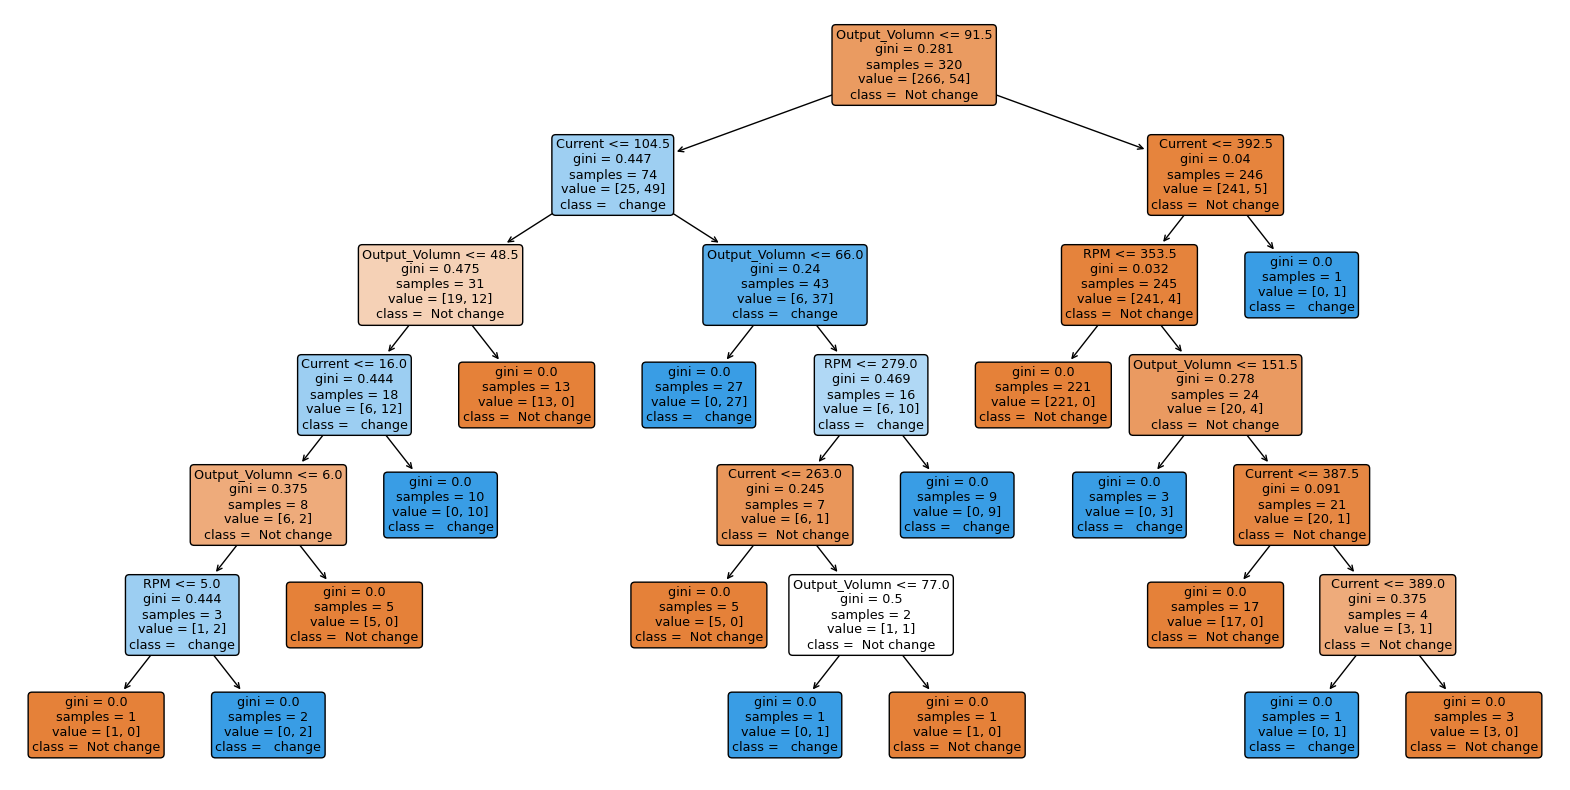

In [27]:
plt.figure(figsize=(20,10))
tree.plot_tree(classifier, filled=True, feature_names=X.columns, class_names=[' Not change', '  change'], rounded=True)
plt.show()

In [28]:
from sklearn.metrics import confusion_matrix

# สมมติว่า y_test เป็น ground truth และ y_pred เป็นค่าที่ทำนายได้
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[68  1]
 [ 1 10]]


In [29]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print("Confusion Matrix:")

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')

# Calculate Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# Calculate Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

Confusion Matrix:
Accuracy: 0.97
F1 Score: 0.91
Recall: 0.91
Precision: 0.91
